S1 & 1.204 & 80 & 11 & 0.0 & 80 & 240.379 & 0.257\\
S2 & 1.204 & 80 & 7 & 0.05 & 70 & 336.626 & 1.015\\
S3 & 1.204 & 80 & 4 & 0.1 & 60 & 325.478 & 3.505\\
S4 & 1.204 & 80 & 3 & 0.15 & 50 & 358.036 & 8.225\\
S5 & 1.204 & 4 & 11 & 0.0 & 80 & 240.379 & 5.116\\
S6 & 5.0 & 4 & 7 & 0.0 & 60 & 257.25 & 17.334\\


Text(0.5, 1.0, 'Phase Offset and Harmonic Power Balance Error')

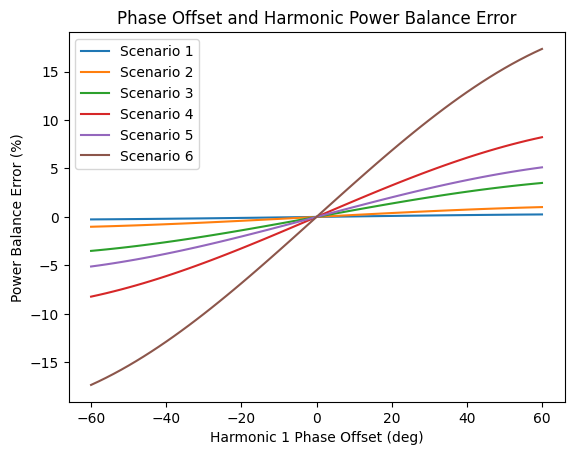

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CdA = 0.3
g = 9.81

def calculate_error(v_avg,gradient,RPM,mass,alpha,rho):
  Force = mass*g*gradient + 1/2 * rho * CdA * v_avg**2
  Resistance = 1/2 * rho * CdA * v_avg
  Reactance = RPM/60 * 2 * np.pi * mass
  Impedance = np.abs(Resistance + 1j*Reactance)
  epsilon = Force/(v_avg*Impedance)*np.sin(np.radians(alpha))*np.sin(np.arctan(Reactance/Resistance))
  epsilon = np.round(epsilon*1e2,3)
  Power = Force * v_avg
  return epsilon,Force,Impedance,Power

Scenarios = [{"Name":1,"mass":80,"v_avg":11,"gradient":0.0,"RPM":80,"rho":1.204},
{"Name":2,"mass":80,"v_avg":7,"gradient":0.05,"RPM":70,"rho":1.204},
{"Name":3,"mass":80,"v_avg":4,"gradient":0.10,"RPM":60,"rho":1.204},
{"Name":4,"mass":80,"v_avg":3,"gradient":0.15,"RPM":50,"rho":1.204},
{"Name":5,"mass":4,"v_avg":11,"gradient":0.0,"RPM":80,"rho":1.204},
{"Name":6,"mass":4,"v_avg":7,"gradient":0.0,"RPM":60,"rho":5.0}]

results = [["Scenario","alpha (degrees)","rho (kgm^-3)","CdA (m^2)","g (ms^-2)","Mass (kg)","Average Velocity (ms^-1)","Gradient (\%)","Cadence (RPM)","Average Force (N)","Impedance (Ohm)","Power (W)","Balance Error (%)"]]

for s in Scenarios:
  alpha = np.linspace(-60,60,61)
  for a in alpha:
    eps,force,impedance,power = calculate_error(v_avg=s["v_avg"],gradient=s["gradient"],RPM=s["RPM"],mass=s["mass"],alpha=a,rho=s["rho"])
    results.append([s["Name"],a,s["rho"],CdA,g,s["mass"],s["v_avg"],s["gradient"],s['RPM'],force,impedance,power,eps])

df = pd.DataFrame(results)
df.columns = df.iloc[0]
df = df.drop(df.index[0]).reset_index(drop=True)
plt.plot(df[df['Scenario'] == 1]['alpha (degrees)'],df[df['Scenario'] == 1]['Balance Error (%)'],label='Scenario 1')
plt.plot(df[df['Scenario'] == 2]['alpha (degrees)'],df[df['Scenario'] == 2]['Balance Error (%)'],label='Scenario 2')
plt.plot(df[df['Scenario'] == 3]['alpha (degrees)'],df[df['Scenario'] == 3]['Balance Error (%)'],label='Scenario 3')
plt.plot(df[df['Scenario'] == 4]['alpha (degrees)'],df[df['Scenario'] == 4]['Balance Error (%)'],label='Scenario 4')
plt.plot(df[df['Scenario'] == 5]['alpha (degrees)'],df[df['Scenario'] == 5]['Balance Error (%)'],label='Scenario 5')
plt.plot(df[df['Scenario'] == 6]['alpha (degrees)'],df[df['Scenario'] == 6]['Balance Error (%)'],label='Scenario 6')

for s in Scenarios:
  max_error = np.max(df[df['Scenario'] == s["Name"]]['Balance Error (%)'])
  avg_power = np.round(np.mean(df[df['Scenario'] == s["Name"]]['Power (W)']),3)
  t = f"S{s['Name']} & {s['rho']} & {s['mass']} & {s['v_avg']} & {s['gradient']} & {s['RPM']} & {avg_power} & {max_error}\\\\"
  print(t)

plt.legend()
plt.xlabel("Harmonic 1 Phase Offset (deg)")
plt.ylabel("Power Balance Error (%)")
plt.title("Phase Offset and Harmonic Power Balance Error")
